# TP2 – Droites de régression

## Exercice 1 : estimation de $D_{Y X}$ par le maximum de vraisemblance
Si $n$ points $P_{i}=\left(x_{i}, y_{i}\right)$ du plan se situent au voisinage d'une droite d'équation paramétrique $y=a x+b,$ il est légitime de modéliser les résidus $r_{(a, b)}\left(P_{i}\right)=y_{i}-a x_{i}-b$ par une loi normale centrée d'écart-type $\sigma$ :
$$
f_{(\sigma, a, b)}\left(P_{i}\right)=\frac{1}{\sigma \sqrt{2 \pi}} \exp \left\{-\frac{r_{(a, b)}\left(P_{i}\right)^{2}}{2 \sigma^{2}}\right\}
$$
La droite de régression de $Y$ en $X$ d'un tel nuage de points, notée $D_{Y X},$ est la droite d'équation paramétrique $y=a^{*} x+b^{*},$ où $a^{*}$ et $b^{*}$ sont les valeurs des paramètres $a$ et $b$ qui maximisent la log-vraisemblance :
$$
\left(\sigma^{*}, a^{*}, b^{*}\right)=\underset{(\sigma, a, b) \in \mathbb{R}^{+} \times \mathbb{R}^{2}}{\arg \max }\left\{\ln \prod_{i=1}^{n} f_{(\sigma, a, b)}\left(P_{i}\right)\right\}=\underset{(\sigma, a, b) \in \mathbb{R}^{+} \times \mathbb{R}^{2}}{\arg \min } \sum_{i=1}^{n}\left\{\ln \sigma+\frac{r_{(a, b)}\left(P_{i}\right)^{2}}{2 \sigma^{2}}\right\}
$$
Si l'on suppose l'écart-type du bruit $\sigma$ fixé, alors le problème se simplifie :
$$
\left(a^{*}, b^{*}\right)=\underset{(a, b) \in \mathbb{R}^{2}}{\arg \min } \sum_{i=1}^{n} r_{(a, b)}\left(P_{i}\right)^{2}=\underset{(a, b) \in \mathbb{R}^{2}}{\arg \min } \sum_{i=1}^{n}\left(y_{i}-a x_{i}-b\right)^{2}
$$
La résolution de (3) par tirages aléatoires n'est pas aussi simple qu'il y paraît, car : d'une part, les inconnues $a$ et $b$ ne sont pas bornées; d'autre part, $a$ ne suit pas une loi uniforme. Néanmoins, il est facile de montrer que $D_{Y X}$ contient le centre de gravité $G .$ On peut donc calculer les coordonnées $\left(x_{G}, y_{G}\right)$ de $G,$ puis centrer les données. L'équation de $D_{Y X}$ devenant $y^{\prime}=a^{*} x^{\prime}$ après changement d'origine, le problème se simplifie encore :
$$
a^{*}=\underset{a \in \mathbb{R}}{\arg \min } \sum_{i=1}^{n}\left(y_{i}^{\prime}-a x_{i}^{\prime}\right)^{2}=\tan \left\{\underset{\psi \in]-\frac{\pi}{2}, \frac{\pi}{2}[} \arg \min _{i=1}^{n}\left(y_{i}^{\prime}-\tan \psi x_{i}^{\prime}\right)^{2}\right\}
$$
Dans (4), la deuxième égalité vient de ce que le paramètre $a$ d'une droite est égal à la tangente de son angle polaire $\psi$. La résolution de (4) peut être effectuée par tirages aléatoires de $\psi$ selon une loi uniforme sur $]-\frac{\pi}{2}, \frac{\pi}{2}[$.

**Écrivez la fonction estimation_1, appelée par le script exercice_1, permettant de résoudre le problème (4).**

1. Calculer le barycentre $G$
2. Centrer les données
3. Échantilonner $\psi$ dans $]-\frac{\pi}{2}; \frac{\pi}{2}[$
4. $\psi^{*} = argmin_{\psi} \sum_{i} (y_i - tan(\psi) x_i)^2$
5. $a^{*}=\underset{a \in \mathbb{R}}{\arg \min } \sum_{i=1}^{n}\left(y_{i}^{\prime}-a x_{i}^{\prime}\right)^{2}=\tan \left\{\underset{\psi \in]-\frac{\pi}{2}, \frac{\pi}{2}[} \arg \min _{i=1}^{n}\left(y_{i}^{\prime}-\tan \psi x_{i}^{\prime}\right)^{2}\right\}$


In [1]:
%%file exercice_1.m

donnees;

n_tests = 100;

% Estimation de la droite de regression par le maximum de vraisemblance :
[a_DYX_1,b_DYX_1] = estimation_1(x_donnees_bruitees,y_donnees_bruitees,n_tests);

% Affichage de la droite de regression estimee par le maximum de vraisemblance :
if abs(a_DYX_1)<1
	x_DYX_1 = x_D;
	y_DYX_1 = a_DYX_1*x_DYX_1+b_DYX_1;
else
	y_DYX_1 = y_D;
	x_DYX_1 = (y_DYX_1-b_DYX_1)/a_DYX_1;
end
plot(x_DYX_1,y_DYX_1,'b','LineWidth',3);
axis(bornes);
lg = legend('~Droite', ...
	'~Donnees bruitees', ...
	'~$D_{YX}$ (maximum de vraisemblance)', ...
	'Location','Best');
set(lg,'Interpreter','Latex');

% Calcul et affichage de l'ecart angulaire :
theta_DYX_1 = atan2(b_DYX_1,-a_DYX_1*b_DYX_1);
EA_DYX_1 = abs(theta_DYX_1-theta_D);
fprintf('D_YX (maximum de vraisemblance) : ecart angulaire = %.2f degres\n',EA_DYX_1/pi*180);


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp2/exercice_1.m'.


D_YX (maximum de vraisemblance) : ecart angulaire = 2.93 degres


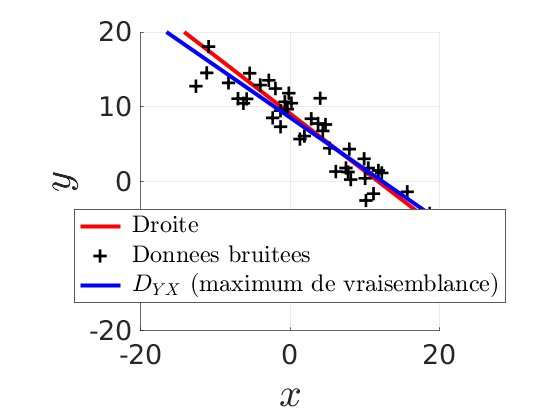

In [11]:
run("exercice_1.m")

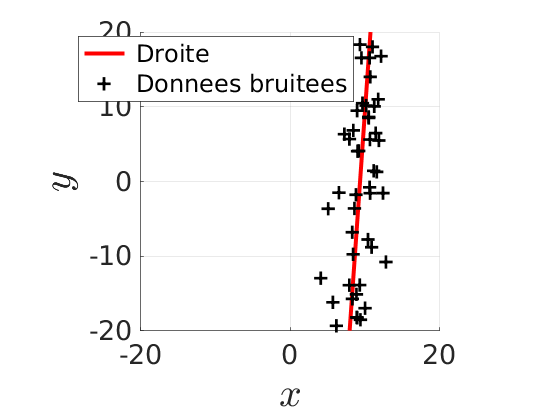

In [3]:
donnees;

n_tests = 100;

In [4]:
%%file estimation_1.m

function [a_star, b_star] = estimation_1(x_i, y_i, n_tests)
    % Estimation Naive de Monte-Carlo
    % Calculer le barycentre  G:
    x_G = mean(x_i);
    y_G = mean(y_i);
    % Centrer les données 
    x_prime = x_i - x_G;
    y_prime = y_i - y_G;
    % Echantilonner Psi dans -pi/2; +pi/2
    psi = pi*rand(n_tests, 1) - pi/2;
    % Recherche du tirage minimum (Monte Carlo)
    n_pts = length(x_prime);
    x_rep = repmat(x_prime, n_tests, 1);
    y_rep = repmat(y_prime, n_tests, 1);
    psi_rep = repmat(psi, 1, n_pts);
    epsilon_j = (y_rep - tan(psi_rep).*x_rep).^2;
    epsilon = sum(epsilon_j, 2);
    [epsilon_star, k_star] = min(epsilon);
    % 
    a_star = tan(psi(k_star));
    b_star = y_G-a_star*x_G;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp2/estimation_1.m'.


In [5]:
x_i = x_donnees_bruitees;
y_i = y_donnees_bruitees;

In [6]:
%Calculer le barycentre  G:
x_G = mean(x_i);
y_G = mean(y_i);

In [7]:
%Centrer les données 
x_prime = x_i - x_G;
y_prime = y_i - y_G;

In [8]:
% Echantilonner Psi dans -pi/2; +pi/2
psi = pi*rand(n_tests, 1) - pi/2;
size(psi)


ans =

   100     1



In [9]:
% Recherche du tirage minimum (Monte Carlo)
n_pts = length(x_prime);
x_rep = repmat(x_prime, n_tests, 1);
y_rep = repmat(y_prime, n_tests, 1);
psi_rep = repmat(psi, 1, n_pts);

epsilon_j = (y_rep - tan(psi_rep).*x_rep).^2;
epsilon = sum(epsilon_j, 2);
[epsilon_star, k_star] = min(epsilon);

In [10]:
a_star = tan(k_star);
b_star = y_G-a_star*x_G;

## Exercice 2 : estimation de $D_{Y X}$ par résolution d'un système linéaire
Le critère à minimiser dans (2) s'écrit $\mathcal{F}(\sigma, a, b)=n \ln \sigma+\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n} r_{(a, b)}\left(P_{i}\right)^{2} .$ Le problème (2) peut donc
également être considéré comme un problème d'optimisation différentiable. En notant $\mathcal{G}(a, b)=\sum_{i=1}^{n} r_{(a, b)}\left(P_{i}\right)^{2}:$
$$
\nabla \mathcal{F}(\sigma, a, b)=0 \quad \Longleftrightarrow\left\{\begin{array}{l}
\nabla_{\sigma} \mathcal{F}(\sigma, a, b)=0 \\
\nabla_{a, b} \mathcal{F}(\sigma, a, b)=0
\end{array} \Longleftrightarrow\left\{\begin{array}{l}
\sigma^{2}=\frac{1}{n} \sum_{i=1}^{n} r_{(a, b)}\left(P_{i}\right)^{2} \\
\nabla \mathcal{G}(a, b)=0
\end{array}\right.\right.
$$
La première de ces équations était prévisible, puisque c'est la définition même de la variance. Quant à la deuxième équation, elle correspond à l'optimalité du critère à minimiser dans (3). Or, ce critère s'écrit aussi :
$$
\mathcal{G}(a, b)=\|A X-B\|^{2}, \text { où } A=\left[\begin{array}{ccc}
x_{1} & \cdots & x_{n} \\
1 & \cdots & 1
\end{array}\right]^{\top}, X=\left[\begin{array}{ll}
a & b
\end{array}\right]^{\top} \text { et } B=\left[\begin{array}{lll}
y_{1} & \cdots & y_{n}
\end{array}\right]^{\top}
$$
Minimiser $\mathcal{G}(a, b)$ revient donc à chercher une solution approchée du système linéaire $A X=B,$ au sens des moindres carrés. Le problème se résout en écrivant les équations normales $A^{\top} A X=A^{\top} B,$ dont la solution s'écrit $X^{*}=\left(A^{\top} A\right)^{-1} A^{\top} B=A^{+} B$, où $A^{+}=\left(A^{\top} A\right)^{-1} A^{\top}$ est la matrice pseudo-inverse de $A$.

Écrivez la fonction estimation_2, appelée par le script exercice_2, permettant de comparer cette méthode d'estimation de $D_{Y X}$ avec celle de l'exercice $1 .$ Observez ce qui se passe lorsque la droite réelle est quasi-verticale. Faites différents tests en faisant varier soit le nombre de données $n,$ soit le paramètre $n_{\text {tests }}$

1. Construire $A$ et $B$
2. Faire la projection

In [12]:
%%file exercice_2.m

exercice_1;

% Estimation de la droite de regression par resolution du systeme AX = B :
[a_DYX_2,b_DYX_2] = estimation_2(x_donnees_bruitees,y_donnees_bruitees);

% Affichage de la droite de regression estimee par resolution du systeme AX = B :
if abs(a_DYX_2)<1
	x_DYX_2 = x_D;
	y_DYX_2 = a_DYX_2*x_DYX_2+b_DYX_2;
else
	y_DYX_2 = y_D;
	x_DYX_2 = (y_DYX_2-b_DYX_2)/a_DYX_2;
end
plot(x_DYX_2,y_DYX_2,'g','LineWidth',3);
lg = legend('~Droite', ...
	'~Donnees bruitees', ...
	'~$D_{YX}$ (maximum de vraisemblance)', ...
	'~$D_{YX}$ (moindres carres)', ...
	'Location','Best');
set(lg,'Interpreter','Latex');

% Calcul et affichage de l'ecart angulaire :
theta_DYX_2 = atan2(b_DYX_2,-a_DYX_2*b_DYX_2);
EA_DYX_2 = abs(theta_DYX_2-theta_D);
fprintf('D_YX (moindres carres) : ecart angulaire = %.2f degres\n',EA_DYX_2/pi*180);


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp2/exercice_2.m'.


D_YX (maximum de vraisemblance) : ecart angulaire = 1.58 degres
D_YX (moindres carres) : ecart angulaire = 0.83 degres


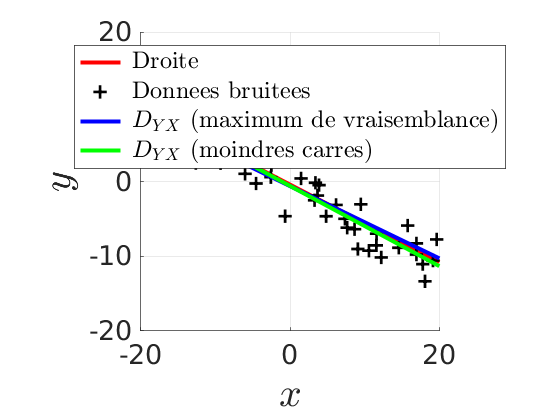

In [22]:
run("exercice_2.m")

In [18]:
%%file estimation_2.m

function [a_star, b_star] = estimation_2(x_i, y_i);
    % Estimation par projection orthogonal de B sur Im(A).
    % Construire A et B
    A = x_i(:);
    A(:, 2) = 1;
    B = y_i(:);
    % Faire la projection
    X = pinv(A)*B;
    a_star = X(1);
    b_star = X(2);
end

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp2/estimation_2.m'.


In [19]:
x_i = x_donnees_bruitees;
y_i = y_donnees_bruitees;

In [20]:
% Construire A et B
A = x_i(:);
A(:, 2) = 1;
B = y_i(:);

In [21]:
%Centrer les données 
X = pinv(A)*B;
a_star = X(1);
b_star = X(2);

## Exercice 3 : estimation de $D_{\perp}$ par le maximum de vraisemblance
Une droite $D$ du plan peut également être définie par son équation cartésienne normalisée $x \cos \theta+y \sin \theta=\rho$ où $(\rho, \theta)$ sont les coordonnées polaires de la projection orthogonale sur $D$ de l'origine $O$ du repère. Si l'on note $\left(x_{Q}, y_{Q}\right)$ les coordonnées cartésiennes de ce point, appelé $Q,$ alors :
- La distance à l'origine de $Q$ vaut $\rho=\sqrt{x_{Q}^{2}+y_{Q}^{2}} \in \mathbb{R}^{+}$
- L'angle polaire $\theta \in]-\pi, \pi]$ de $Q$ se calcule, en Matlab, à l'aide de l'expression atan2 $\left(y_{Q}, x_{Q}\right)$. Dans le cas où la droite $D$ passe par l'origine $O,$ l'angle polaire $\theta$ de $Q=O$ n'est pas défini. L'équation cartésienne normalisée de $D$ s'écrit alors $x \cos \theta+y \sin \theta=0,$ où $\theta$ est l'angle polaire d'un des vecteurs orthogonaux à $D .$ Or, cet angle est défini à $\pi$ près. Il est donc notable que dans l'équation cartésienne normalisée $x \cos \theta+y \sin \theta=\rho$ d'une droite $D$ du plan, l'angle polaire $\theta$ est défini de manière unique lorsque $D$ ne passe pas par l'origine $O,$ mais que cet angle est seulement défini à $\pi$ près lorsque $D$ contient $O$.
Il semble légitime de modéliser les résidus $r_{(\theta, \rho)}\left(P_{i}\right)=x_{i} \cos \theta+y_{i} \sin \theta-\rho$ par une loi normale centrée :
$$
f_{(\sigma, \theta, \rho)}\left(P_{i}\right)=\frac{1}{\sigma \sqrt{2 \pi}} \exp \left\{-\frac{r_{(\theta, \rho)}\left(P_{i}\right)^{2}}{2 \sigma^{2}}\right\}
$$
La droite de régression en distance orthogonale du nuage de points, notée $D_{\perp},$ est la droite d'équation $x \cos \theta^{*}+y \sin \theta^{*}=\rho^{*},$ où $\theta^{*}$ et $\rho^{*}$ sont les valeurs des paramètres $\theta$ et $\rho$ qui maximisent la log-vraisemblance :
$$
\left(\sigma^{*}, \theta^{*}, \rho^{*}\right)=\underset{\left.\left.(\sigma, \theta, \rho) \in \mathbb{R}^{+} \times\right] 0, \pi\right] \times \mathbb{R}}{\arg \max }\left\{\ln \prod_{i=1}^{n} f_{(\sigma, \theta, \rho)}\left(P_{i}\right)\right\}=\underset{\left.\left.(\sigma, \theta, \rho) \in \mathbb{R}^{+} \times\right] 0, \pi\right] \times \mathbb{R}}{\arg \min } \sum_{i=1}^{n}\left\{\ln \sigma+\frac{r_{(\theta, \rho)}\left(P_{i}\right)^{2}}{2 \sigma^{2}}\right\}
$$
En supposant $\sigma$ fixé, et sachant que la droite de régression $D_{\perp}$ contient elle aussi le centre de gravité $G,$ la résolution du problème (8) est en tout point analogue à celle du problème (2). Par analogie avec (4) :
$$
\theta^{*}=\underset{\theta \in] 0, \pi]}{\arg \min } \sum_{i=1}^{n}\left(x_{i}^{\prime} \cos \theta+y_{i}^{\prime} \sin \theta\right)^{2}
$$
Écrivez la fonction estimation_3, appelée par exercice_3, permettant de résoudre le problème (9).

In [23]:
%%file exercice_3.m

donnees;

n_tests = 100;

% Estimation de la droite de regression par le maximum de vraisemblance :
[theta_Dorth_1,rho_Dorth_1] = estimation_3(x_donnees_bruitees,y_donnees_bruitees,n_tests);

% Affichage de la droite de regression estimee par le maximum de vraisemblance :
cos_theta_Dorth_1 = cos(theta_Dorth_1);
sin_theta_Dorth_1 = sin(theta_Dorth_1);
if abs(cos_theta_Dorth_1)<abs(sin_theta_Dorth_1)
	x_Dorth_1 = x_D;
	y_Dorth_1 = (rho_Dorth_1-x_Dorth_1*cos_theta_Dorth_1)/sin_theta_Dorth_1;
else
	y_Dorth_1 = y_D;
	x_Dorth_1 = (rho_Dorth_1-y_Dorth_1*sin_theta_Dorth_1)/cos_theta_Dorth_1;
end
plot(x_Dorth_1,y_Dorth_1,'b','LineWidth',3);
axis(bornes);
lg = legend('~Droite', ...
	'~Donnees bruitees', ...
	'~$D_\perp$ (maximum de vraisemblance)', ...
	'Location','Best');
set(lg,'Interpreter','Latex');

% Calcul et affichage de l'ecart angulaire :
EA_Dorth_1 = abs(theta_Dorth_1-theta_D);
fprintf('D_perp (maximum de vraisemblance) : ecart angulaire = %.2f degres\n',EA_Dorth_1/pi*180);

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp2/exercice_3.m'.


D_perp (maximum de vraisemblance) : ecart angulaire = 0.34 degres


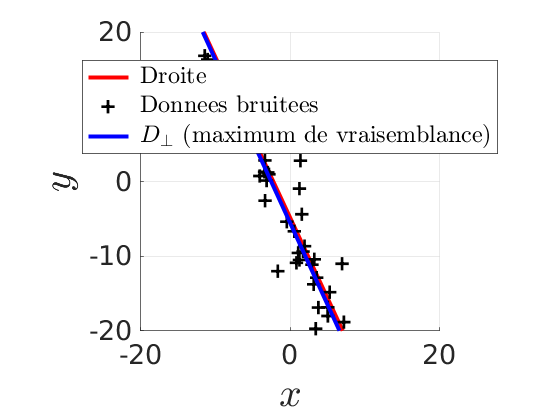

In [37]:
run("exercice_3.m")

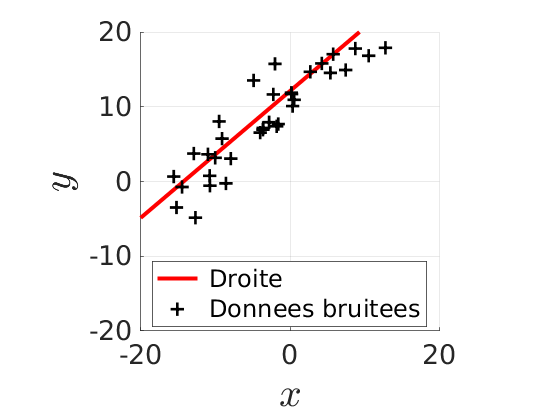

In [25]:
donnees;

n_tests = 100;

In [36]:
%%file estimation_3.m
    
function [theta_Dorth_1,rho_Dorth_1] = estimation_3(x_i, y_i, n_tests);
    % Estimation Naive de Monte-Carlo
    %Calculer le barycentre  G:
    x_G = mean(x_i);
    y_G = mean(y_i);
    %Centrer les données 
    x_prime = x_i - x_G;
    y_prime = y_i - y_G;
    % Echantilonner Theta dans 0; +pi
    theta = pi*rand(n_tests, 1);
    % Recherche du tirage minimum (Monte Carlo)
    n_pts = length(x_prime);
    x_rep = repmat(x_prime, n_tests, 1);
    y_rep = repmat(y_prime, n_tests, 1);
    theta_rep = repmat(theta, 1, n_pts);

    epsilon_j = ( x_rep.*cos(theta_rep) + y_rep.*sin(theta_rep) ).^2;
    epsilon = sum(epsilon_j, 2);
    [epsilon_star, k_star] = min(epsilon);
    theta_star = theta(k_star);
    rho_star = x_G*cos(theta_star)+y_G*sin(theta_star);
    if rho_star < 0 
         theta_star = theta_star - pi;
         rho_star = x_G*cos(theta_star)+y_G*sin(theta_star);
    end;
    theta_Dorth_1 = theta_star;
    rho_Dorth_1 = rho_star;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp2/estimation_3.m'.


In [27]:
x_i = x_donnees_bruitees;
y_i = y_donnees_bruitees;

In [28]:
%Calculer le barycentre  G:
x_G = mean(x_i);
y_G = mean(y_i);

In [29]:
%Centrer les données 
x_prime = x_i - x_G;
y_prime = y_i - y_G;

In [30]:
% Echantilonner Theta dans 0; +pi
theta = pi*rand(n_tests, 1);
size(theta)


ans =

   100     1



In [31]:
% Recherche du tirage minimum (Monte Carlo)
n_pts = length(x_prime);
x_rep = repmat(x_prime, n_tests, 1);
y_rep = repmat(y_prime, n_tests, 1);
theta_rep = repmat(theta, 1, n_pts);

epsilon_j = ( x_rep.*cos(theta_rep) + y_rep.*sin(theta_rep) ).^2;
epsilon = sum(epsilon_j, 2);
[epsilon_star, k_star] = min(epsilon)


epsilon_star =

  148.1883


k_star =

    61



In [34]:
theta_star = theta(k_star);
a_starQ = atan(theta_star);
b_starQ = y_G-a_starQ*x_G;

## Exercice 4 : estimation de $D_{\perp}$ par résolution d'un système linéaire
Le critère $\mathcal{I}(\theta)=\sum_{i=1}^{n}\left(x_{i}^{\prime} \cos \theta+y_{i}^{\prime} \sin \theta\right)^{2}$ à minimiser dans (9) s'appelle l'inertie. Il s'écrit également :
$$
\mathcal{I}(\theta)=\|C Y\|^{2} \quad, \text { où } C=\left[\begin{array}{ccc}
x_{1}^{\prime} & \cdots & x_{n}^{\prime} \\
y_{1}^{\prime} & \cdots & y_{n}^{\prime}
\end{array}\right]^{\top} \quad \text { et } Y=\left[\begin{array}{cc}
\cos \theta & \sin \theta
\end{array}\right]^{\top}
$$
Or, la solution approchée du système linéaire $C Y=O$, au sens des moindres carrés ordinaires, vaut $C^{+} O=O$. Pour éviter cette solution, on impose la contrainte $\|Y\|=1 .$ Ce nouveau problème se résout en introduisant le lagrangien $\mathcal{L}(Y, \lambda)=\|C Y\|^{2}+\lambda\left(1-\|Y\|^{2}\right),$ où $\lambda$ constitue un multiplicateur de Lagrange. La condition d'optimalité de $\mathcal{L}$ s'écrit :
$$
\nabla \mathcal{L}(Y, \lambda)=0 \quad \Longleftrightarrow\left\{\begin{array}{l}
\nabla_{Y} \mathcal{L}(Y, \lambda)=0 \\
\nabla_{\lambda} \mathcal{L}(Y, \lambda)=0
\end{array} \Longleftrightarrow\left\{\begin{array}{l}
C^{\top} C Y=\lambda Y \\
\|Y\|=1
\end{array}\right.\right.
$$
Sachant que $C^{\top} C$ est symétrique réelle, cette matrice admet une base orthonormée de vecteurs propres. De plus, comme $C^{\top} C$ est semi-définie positive, ses valeurs propres sont positives ou nulles. Le minimiseur de $\mathcal{I}(\theta)$ de norme $1,$ noté $Y^{*},$ est donc un des deux vecteurs propres associés à la plus petite valeur propre de $C^{\top} C .$ En effet, pour un vecteur propre $Y_{p}$ de norme $1,$ associé à la valeur propre $\lambda_{p}:\left\|C Y_{p}\right\|^{2}=Y_{p}^{\top} C^{\top} C Y_{p}=\lambda_{p} Y_{p}^{\top} Y_{p}=\lambda_{p}$.
Écrivez la fonction `estimation_4`, appelée par `exercice_4`, permettant de comparer cette méthode d'estimation de $D_{\perp}$ à celle de l'exercice 3 . Observez l'évolution des résultats en fonction de $n$ et de $n_{\text {tests. }}$

In [104]:
%%file exercice_4.m

exercice_3;

% Estimation de la droite de regression par resolution du systeme CY = 0 :
[theta_Dorth_2, rho_Dorth_2] = estimation_4(x_donnees_bruitees,y_donnees_bruitees);

% Affichage de la droite de regression estimee par resolution du systeme lineaire CY = 0 :
cos_theta_Dorth_2 = cos(theta_Dorth_2);
sin_theta_Dorth_2 = sin(theta_Dorth_2);
if abs(cos_theta_Dorth_2)<abs(sin_theta_Dorth_2)
    x_Dorth_2 = x_D;
    y_Dorth_2 = (rho_Dorth_2-x_Dorth_2*cos_theta_Dorth_2)/sin_theta_Dorth_2;
else
    y_Dorth_2 = y_D;
    x_Dorth_2 = (rho_Dorth_2-y_Dorth_2*sin_theta_Dorth_2)/cos_theta_Dorth_2;
end
plot(x_Dorth_2,y_Dorth_2,'g','LineWidth',3);
lg = legend('~Droite', ...
    '~Donnees bruitees', ...
    '~$D\perp$ (maximum de vraisemblance)', ...
    '~$D_\perp$ (moindres carres)', ...
    'Location','Best');
set(lg,'Interpreter','Latex');

% Calcul et affichage de l'ecart angulaire :
EA_Dorth_2 = abs(theta_Dorth_2-theta_D);
fprintf('D_perp (moindres carres) : ecart angulaire = %.2f degres\n',EA_Dorth_2/pi*180);

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp2/exercice_4.m'.


D_perp (maximum de vraisemblance) : ecart angulaire = 0.41 degres
D_perp (moindres carres) : ecart angulaire = 0.35 degres


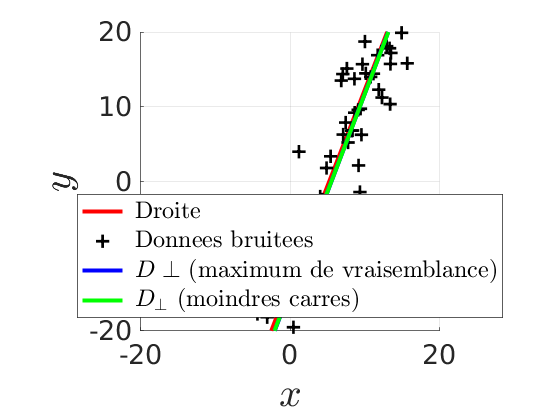

In [115]:
run("exercice_4.m")

In [109]:
%%file estimation_4.m
    
function [theta_Dorth_2,rho_Dorth_2] = estimation_4(x_i, y_i)
    % Estimation Optimisation sous contrainte avec Lagragien
    % Calculer le barycentre  G:
    x_G = mean(x_i);
    y_G = mean(y_i);
    % Centrer les données 
    x_prime = x_i - x_G;
    y_prime = y_i - y_G;
    % Matrice d'inértie:
    C = [x_prime; y_prime];
    C = C';
    % Calcul des Valeurs propre:
    [V, D] = eig(C'*C);
    lambda = diag(D);
    [lambda_min, I_min] = min(lambda);
    % Calcul de Y: Vector propre associé a lambda_min
    Y = V(:, I_min);
    % Calcul de theta et rho
    theta_star = atan2( Y(2), Y(1) ); %arctan(cos(theta)/sin(theta))
    rho_star = x_G*cos(theta_star) + y_G*sin(theta_star);
    if rho_star < 0 
         theta_star = theta_star - pi;
         rho_star = x_G*cos(theta_star) + y_G*sin(theta_star);
    end;
    theta_Dorth_2 = wrapToPi(theta_star);
    rho_Dorth_2 = rho_star;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp2/estimation_4.m'.


In [92]:
x_i = x_donnees_bruitees;
y_i = y_donnees_bruitees;

In [93]:
%Calculer le barycentre  G:
x_G = mean(x_i);
y_G = mean(y_i);

In [94]:
%Centrer les données 
x_prime = x_i - x_G;
y_prime = y_i - y_G;

In [96]:
% Matrice d'inértie:
clearvars C
C(1, :) = x_prime;
C(2, :) = y_prime;
% Calcul des Valeurs propre:
[V, D] = eig(C'*C);
lambda = diag(D)
[lambda_min, I_min] = min(lambda)


lambda =

   1.0e+03 *

   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
   -0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.1095
    2.2377


lambda_min =

  -2.7110e-13


I_min =

     1



In [52]:
% Calcul de Y: Vector propre associé a lambda_min
Y = V(:, I_min);

In [53]:
% Calcul de theta et rho
theta_star = atan(Y(1)/Y(2)); %arctan(cos(theta)/sin(theta))
rho_star = x_G*cos(theta_star)+y_G*sin(theta_star);
theta_Dorth_1 = theta_star;
rho_Dorth_1 = rho_star;

In [54]:
theta_star = atan(Y(1)/Y(2))


theta_star =

    0.1240

